## Notebook Setup 
The following cell will install Drake, checkout the underactuated repository, and set up the path (only if necessary).
- On Google's Colaboratory, this **will take approximately two minutes** on the first time it runs (to provision the machine), but should only need to reinstall once every 12 hours.  Colab will ask you to "Reset all runtimes"; say no to save yourself the reinstall.
- On Binder, the machines should already be provisioned by the time you can run this; it should return (almost) instantly.

More details are available [here](http://underactuated.mit.edu/drake.html).

In [1]:
try:
  import pydrake
  import underactuated
except ImportError:
  !curl -s https://raw.githubusercontent.com/RussTedrake/underactuated/master/scripts/setup/jupyter_setup.py > jupyter_setup.py
  from jupyter_setup import setup_underactuated
  setup_underactuated()

# Autapse

The simplest recurrent neural network model.  $$\dot{x} = -x + \tanh(wx + u)$$


<IPython.core.display.Javascript object>


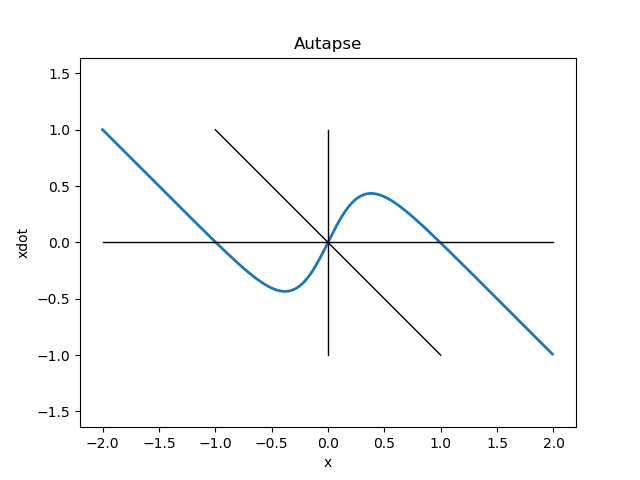

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

from underactuated.jupyter import SetupMatplotlibBackend
plt_is_interactive = SetupMatplotlibBackend()


def autapse(x, w=1, u=0):
    """Args:
    w is feedback weight
    u is input
    """
    return -x + np.tanh(w * x + u)


Autapse = np.vectorize(autapse)
xmax = 2.
ymax = 1.
x = np.arange(-xmax, xmax, 0.01)

fig = plt.figure()

if plt_is_interactive:
  line, = plt.plot(x, Autapse(x, w=3., u=0), linewidth=2.)

  def update(w=1, u=0):
    line.set_ydata(Autapse(x, w=w, u=u))
    fig.canvas.draw()
    
  interact(update, w=(0,3,0.1), u=(-1.5,1.5,0.1))
  
else:
  plt.plot(x, Autapse(x, w=.75, u=0), linewidth=2., label="w=3/4")
  plt.plot(x, Autapse(x, w=3., u=0), linewidth=2., label="w=3")
  plt.legend()

plt.xlabel("x")
plt.ylim((-ymax, ymax))
plt.ylabel("xdot")

# draw the x and y axes.
plt.plot([-xmax, xmax], [0, 0], color="k", linestyle="-", linewidth=1.)
plt.plot([0, 0], [-ymax, ymax], color="k", linestyle="-", linewidth=1.)
# draw the line through the origin with slope -1.
plt.plot([-ymax, ymax], [ymax, -ymax], color="k", linestyle="-", linewidth=1.)

plt.title("Autapse")
plt.axis("equal");


# Long short-term memory (LSTM)

A recurrent neural network component..  [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

We'll look at the ["gated recurrent unit" version](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)...
\begin{align}
i[n] &= \sigma_g(A_{i} x[n] + B_{i} u[n] + c_i) & \text{input gate} \\
o[n] &= \sigma_g(A_{o} x[n] + B_{o} u[n] + c_o) & \text{output gate} \\
f[n] &= \sigma_g(A_{f} x[n] + B_{f} u[n] + c_f) & \text{forget gate} \\
x[n+1] &= f[n] \circ x[n] + i[n] \circ \tanh(B_{x} u[n] + c_c) \\
y[n] &= \tanh(o[n] \circ x[n])
\end{align}

where the operator $\circ$  denotes the Hadamard product (element-wise product). $\sigma _{g}(x) = \frac{1}{1+e^{-x}} \in (0,1)$ is the sigmoid function and recall that $\tanh(x) \in (-1,1)$.

In the example below, we will plot the continuous-time version of this (to stay consistent with the rest of the analysis in the chapter), $\dot{x}$ vs $x$.  To keep the number of parameters reasonable, I've assumed that there are three inputs -- with $$u = \begin{bmatrix} u_{input} \\ u_{forget} \\ u_{x} \end{bmatrix}, B_i = [ 1, 0 0 ], B_f = [ 0, 1, 0 ], B_x = [ 0, 0, 1].$$ Note that the output $y$ has no impact on the stability and is not represented below.


<IPython.core.display.Javascript object>


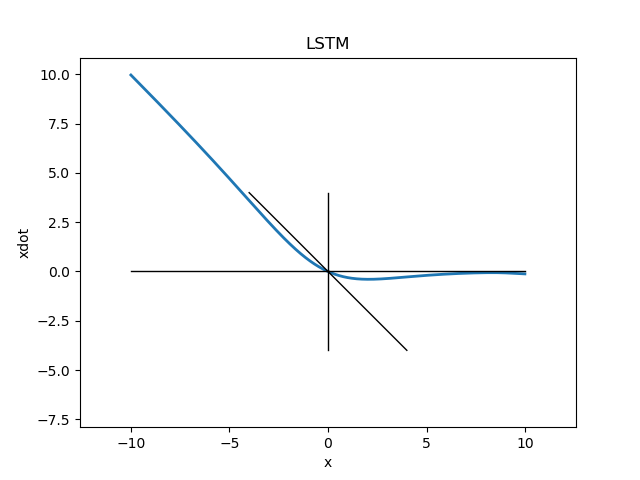

In [5]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

def sigma(x):
  return 1./(1+np.exp(-x))

def lstm(x, uf=0, ui=0, ux=0, af=1, bf=1, cf=0, ai=1, bi=1, ci=0, bx=1, cx=0):
  return - x + sigma(af*x + bf*uf + cf)*x + sigma(ai*x + bi*ui + ci) * np.tanh(bx*ux+cx)

Lstm = np.vectorize(lstm)
xmax = 10.
ymax = 4.
x = np.arange(-xmax, xmax, 0.01)

fig = plt.figure()

if plt_is_interactive:
  line, = plt.plot(x, Lstm(x, uf=-10, ui=-10, ux=0), linewidth=2.)

  def update(u_forget, u_input, u_x,
             a_forget, b_forget, c_forget,
             a_input, b_input, c_input,
             b_x, c_x):
    line.set_ydata(Lstm(x,
                        uf=u_forget, ui=u_input, ux=u_x,
                        af=a_forget, bf=b_forget, cf=c_forget,
                        ai=a_input, bi=b_input, ci=c_input,
                        bx=b_x, cx=c_x))
    fig.canvas.draw()
    
  interact(update,
           u_forget=(-10,10,0.1),
           u_input=(-10,10,0.1),
           u_x=(-10,10,0.1),
           a_forget=(0,2,0.1),
           b_forget=(0,2,0.1),
           c_forget=(-1,1,.1),
           a_input=(0,2,0.1),
           b_input=(0,2,0.1),
           c_input=(-1,1,.1),
           b_x=(0,2,0.1),
           c_x=(-1,1,.1),
          )
  
else:
  def plot_lstm(uf=0, ui=0, ux=0):
    plt.plot(x, Lstm(x, uf=uf, ui=ui, ux=ux), linewidth=2., label="uf=" + str(uf) + ",ui=" + str(ui) + ", ux=" + str(ux))
  
  for us in np.arange(-1,1,.25):
    plot_lstm(uf=0, ui=0, ux=us)
  plt.legend()

plt.xlabel("x")
plt.ylim((-ymax, ymax))
plt.ylabel("xdot")

# draw the x and y axes.
plt.plot([-xmax, xmax], [0, 0], color="k", linestyle="-", linewidth=1.)
plt.plot([0, 0], [-ymax, ymax], color="k", linestyle="-", linewidth=1.)
# draw the line through the origin with slope -1.
plt.plot([-ymax, ymax], [ymax, -ymax], color="k", linestyle="-", linewidth=1.)

plt.title("LSTM")
plt.axis("equal");


I will make a few observations.  First, I'll admit that the behavior here looks pretty strange to me!  When "forget gate" is on (corresponding to a large negative input $u_{forget}$) and the "input gate" is off (corresponding to a large negative input $u_{input}$), the system has a stable fixed point close to zero.  When the forget gate is off (large $u_{forget}$ -- yes, it feels backwards to me, too) then the system becomes an integrator which will accumulate the input $u_x$.  Yes -- it's unstable!  And no, it's not an artifact of the continuous-time implementation.  The total output of the system is limited by the output $\tanh$, but the internal state is unstable.

The design of these units does not appear to have been made by someone who knew dynamics (nor graphical analysis). That they seem to work somewhat well in practice is fairly remarkable to me.  Shouldn't we be able to do better?

Note: The parameter space here is large and the interpretations subtle.  If you find a better parameter regime and/or different interpretation, then I'd love to hear about it.